<a href="https://colab.research.google.com/github/TrickyTroll/ML-intro/blob/master/OCR_SAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notions de base

### Introduction au réseau neuronal
Un réseau neuronal est une forme d'intelligence artificielle, qui effectue des prédictions basées sur des valeurs qui sont entrées dans le système, afin d'accomplir une certaine tâche. Le réseau est constitué d'un ensemble de neurones interconnectés et distribués en plusieurs couches. 

Chaque neurone possède des paramètres qui peuvent être ajustés, afin d'obtenir des résultats plus fiables. C'est ce qu'on appele l'entrainement.
Le réseau est entrainé à partir d'un jeu de données, qui contient des valeurs associées à une étiquette, qui consiste de la "réponse" attendue. 

Par exemple, un réseau neuronal ayant comme objectif de prédire l'achalandage dans un parc d'amusement pour une journée donnée pourrait recevoir comme intrant la température, le niveau d'ensoleillement ainsi que le pourcentage de précipitation et d'humidité. Le jeu de données serait alors constituée d'une liste ces quatres valeurs enregistrées à chaque jour des dernières années, avec comme étiquette le nombre de clients cette journée-là. Les réponses du réseau sont comparées aux étiquettes, et les paramètres des neurones sont individuellement modifiés de manière à se rapprocher de la réponse attendue.


 ![picture](https://drive.google.com/uc?export=view&id=1c7VtAd-NvVteokYgHm_UMHoj7pr7FiuF)

```{figure} ./img/reseauneuronalsimp.png
---
name: Réseau neuronal
---
Ceci est un exemple simplifié d'un réseau neuronal. Les composantes du schéma seront expliquées en détail dans cette section.
```
 



### OCR
Le terme OCR, ou ROC en français, signifie "Reconnaissance optique de caractères". Cela désigne un processus aucours duquel du texte est extrait 
d'une image ou d'un document afin d'être transformé en fichier. Pour ce faire, un réseau neuronal reçoit les valeurs des pixels du document de source,
>Note : La valeur d'un pixel en "grayscale" ou échelle de gris, est un nombre entier
>de format 8 bits et peut donc avoir
>une valeur comprise entre 0 et 255 (2^8 - 1), où 0 est noir et 255 est blanc. 
>Un pixel en couleur est représenté sous la forme d'un vecteur de 3 nombres 8
>bits, chaque nombre correspondant à une valeur de rouge, vert et bleu. {cite}`HIPR2`
                    
  traitées afin de les rendre utilisables par le réseau. Ces données se propagent ensuite vers l'avant
dans le réseau, de couche de neurone en couche de neurone, avant d'aboutir à la couche d'extrants, composée de 10 neurones dans le cas de notre 
programme, qui correspondent aux chiffres de 0 à 9. Un de ces neurones de cette couche finale s'active, donnant ainsi le résultat estimé par le réseau. 
Ensuite, divers paramètres sont ajustés par un algorithme d'optimisation afin d'augmenter la précision des réponses du réseau.



### Le neurone
Le neurone est l'unité de base d'un réseau neuronal. C'est un noeud parmis le réseau par lequel transitent des valeurs, qui sont modifiées 
au passage par un procédé qui sera expliqué plus en détail prochainement, avant d'être envoyées vers les prochains neurones. 
Essentiellement, un neurone reçoit une ou des valeurs comme intrant, effectue des opérations sur ces dernières, puis transmet la nouvelle valeur.

La structure d'un neurone est relativement simple. Chaque neurone possède un coefficient, ou un **poids** $p$ dans le jargon, associé à chaque **intrant** $I$ qu'elle reçoit.
La première opération que la neurone effectue est la somme des produits des intrants fois leur poids. À celà est ajouté un **biais** $b$ propre à chaque neurone.
Cette opération peut être représentée par la fonction $$Y = \sum_{i=1}^{n} I_i \times p_i + b$$, où n correspond au nombre d'intrants.

La dernière opération que les valeurs subissent avant d'être transmises est une fonction d'activation. La fonction d'activation est appliquée à chaque extrant de chaque
neurone de la couche. Les fonctions d'activation, analogues à l'activation
d'un neurone biologique, permettent généralement d'obtenir un extrant compris entre 0 et 1, ou -1 et 1. Elles ont plusieurs utilités, notamment 
pour la modélisation de fonctions non linéeaires, ainsi que pour l'entrainement du réseau, ce qui sera expliqué dans une section ultérieure.

```{figure} ./img/neurone.png
---
name: Neurone
---
Exemple des opérations effectuées au sein d'un neurone.
````

La fonction la plus simple est la fonction à échelons. Elle retourne 1 si l'intrant *x* est plus grand qu'une valeur seuil *s*, et 0 s'il ne l'est pas. Cette fonction peut être représentée par l'équation
$$
E(x)=
\begin{cases}
 1 & \quad \text{si } x \text{ > s}\\
 0 & \quad \text{si } x \text{ <= s}
\end{cases}
$$
Elle n'est néanmoins pas utilisée, puisqu'elle empêche l'entrainement du réseau.
La fonction d'activation doit être dérivable en une autre fonction, et non en une constante, afin que le processus d'ajustement des paramètres puisse avoir lieu. Il est également impossible de représenter des situations non-linéeaires avec cette fonction, puisque seulement des fonctions linéaires sont présentes dans le réseau.

La fonction d'activation la plus utilisée est la fonction Unité Linéaire Rectifiée, ou "ReLU" en anglais (Rectified Linear Unit).
Cette fonction peut être représentée par l'équation :  $$
R(x)=
\begin{cases}
 x & \quad \text{si } x \text{ > 0}\\
 0 & \quad \text{si } x \text{ <= 0}
\end{cases}
$$
                                                        
ou encore, $ R(x) = max(0, x)$. Cette fonction est peu demandante à calculer pour l'ordinateur, et se fait très rapidement. De plus, malgré son apparence linéaire,
elle peut être dérivée, ce qui est nécessaire pour pouvoir entrainer le réseau. C'est pour ces raisons que c'est la fonction d'activation la plus répendue.
Elle a toutefois comme désavantage de produire parfois une trop grande quantité de "0", ce qui peut entrainer une réaction en chaine, où ces zéros se propagent, 
empêchant le bon fonctionnement du réseau. Cette situation est appelée la "mort du réseau", où l'extrant de plusieurs neurones devient invariablement 0, ce qui diminue l'efficacité du réseau. Ce phénomène se produit surtout lorsque le réseau se fait entrainer de manière trop rigoureuse, et que le biais de certaines neurones devient une très grande valeur négative, ce qui fait que l'intrant dans la fonction d'activation est toujours en dessous de 0, et l'extrant reste ainsi invariablement 0.


Une variation de cette fonction, nommée Leaky ReLU, a été créée afin de tenter de régler ce problème de mort du réseau : $$ 
L(x)=
\begin{cases}
 x & \quad \text{si } x \text{ > 0}\\
 0,01 \times x & \quad \text{si } x \text{ <= 0}
\end{cases}
$$
                                                         
Ici, les zéros sont remplacés par de très petits nombres négatifs, qui correspondent généralement à x multiplié par le coefficient 0,01. 


Une autre fonction commune est la sigmoide. Son équation est : 
$$ \phi(x) = 
\frac{1}{1 + e^{-x}}
$$
La fonction retourne 0 lorsque x tend vers l'infini négatif, et 1 lorsque x tend vers l'infini positif. Cette fonction a comme avantage de s'approcher rapidement de 0 ou de 1, lorsque l'intrant *x* est plus petit que -2 ou plus grand que 2, respectivement. Cela permet d'envoyer un signal très fort aux prochains neurones. Cela peut toutefois devenir un désavantage lorsque les intrants sont très grands, puisque l'extrant reste pratiquement le même, ce qui peut nuire à l'entrainement. Cette fonction est également plus lourde pour l'ordinateur, ce qui peut ralentir considérablement le système lorsque ce calcul est effectué des centaines ou des milliers de fois.

Une fonction similaire à la sigmoide et la TanH. Son équation est :
$$ tanh(x) = 
\frac{2}{1 + e^{-2x}} - 1
$$
Elle retourne -1 lorsque x tend vers l'infin négatif, et 1 lorsque x tend vers l'infini positif. Elle a comme avantage de retourner en moyenne des valeurs proches de 0, ce qui rend la tâche plus facile pour les couches d'après, puisque les valeurs auront moins tendance à devenir très grandes, ce qui ralentirait les opérations.


### Couches de neurones

Comme mentionné précedemment, les neurones sont organisés en couches. Il y a 3 types de couches différentes. La première est la couche des intrants, dans laquelle 
les données sont rentrées dans le réseau. Dans le cas de notre programme, où les intrants sont des images de format 28x28, la première couche est composée de 784 (28*28 = 784) neurones recevant chacun la valeur en echelle de gris  d'un pixel de l'image. Plus concrètement, ces images sont des matrices $M_{28}$, qui se font vectoriser

### Réseaux neuronaux et le cerveau humain
Plusieurs liens peuvent être faits entre les réseaux neuronaux et le cerveau humain. Le premier réseau neuronal était un système mécanique financé par la marine américaine qui tentait d'émuler les neurones biologiques. La fonction d'activation à échelons était utilisée, imitant les neurones biologiques qui s'activent *1* ou ne s'activent pas *0*. Le projet a rapidement été laissé de côté, principalement à cause du fait que le réseau était extrêmement difficile à entrainer, puisque, comme vu plus tôt, la fonction à échelon ne permet pas l'entrainement du réseau, et les paramètres devaient être ajustés au hasard. 

Voilà donc une première différence fondamentale entre les neurones artificiels et organiques. Les neurones artificiels peuvent sortir toutes sortes de valeurs, de manière à mieux servir les intérêts du système, alors que dans le cas d'un neurone organique, elles ne peuvent envoyer que le signal binaire *activé* ou *non-activé*. 

>Un neurone s'active lorsque son seuil d'excitation est atteint. Le potentiel de repos d'un neurone est d'environ -50mV. Lorsqu'il reçoit suffisament de neurotransmetteurs (des particules envoyées par d'autre neurones et qui possèdent une charge électrique), par ses dendrites et que le seuil d'excitation d'environ 15mV est atteint, le potentiel d'action se déclenche, et un influx nerveux se propage le long de l'axone sous forme de courant électrique. Une fois arrivé aux terminaisons axonales du neurone, d'autres neurotransmetteurs sont libérés par les synapses, poursuivant ainsi la transmission du signal. La quantité de neurotransmetteurs libérée ne dépend pas de l'intensité du stimulus initial ; c'est une situation de tout ou rien. {cite}`futura-sciences`

En d'autres termes, l'image de la fonction d'un neurone artificiel *A*, dépendamment de la fonction d'activation, peut être, par exemple $\mathbb{R}$ , $\mathbb{R^+}$, ou encore $[-1, 1]$, 
tandis que l'image de la fonction d'un neurone organique *O* est toujours limité à $\text{{0, 1}}$. 

L'aspect ou les réseaux neuronaux et le cerveau humain ont le plus en commun est leur état initial vierge.









## L'entrainement d'un système neuronal
L'entrainement d'un réseau à l'aide d'une certaine base de données (donnée d'entrainement) permet à celui-ci de prédire le résultat d'une autre base donnée. En effet, le but d'un réseau neuronal est de réduire l'erreur de l'entrainement ainsi que la différence entre l'erreur des données entrainées et l'erreur des données de test soient petites. Lorsque le réseau est sous-entrainé, le réseau de sera pas précis lors de ces résultats. Cependant, lorsque le réseau est sur-entrainé, celui-ci va prendre en compte tout le bruit des données. Ce bruit peut être, par exemple, le fait de prendre en compte les imperfections d'une image, reconnaitre seulement certains styles d'écriture, etc. Cela a comme impact d'augmenter l'erreur lorsque le système est exposé à une nouvelle base de données.
```{figure} ./img/overfitting.png
---
name: overfitting
---
Graphiques représentant l'effet de l'entrainement du réseau de neurone
```

L'entrainement d'un réseau neuronal s'effectue à l'inverse. Visuellement, l'entrainement et l'ajustement des différents paramètres se font de la droite vers la gauche. Ce principe, appelé "backpropagation", va être expliqué à l'aide quelques démonstrations mathématiques complémentées par quelques explications écrites.

### Fonction d'erreur
Une fonction d'erreur est une fonction permettant de connaitre la précision des résultats des extrants de la dernière couche. Il peut y avoir plusieurs fonctions d'erreur. En voici un exemple:
  
$$E_{SS}=1/2\sum_{i=1}^nE_i^2 $$ __(1.1)__
  
$$E_{SS}=1/2\sum_{i=1}^nE_i^2 $$ __(1.2)__

où $E_{SS}$= "error sum of square". Cela est tout simplement une de plusieurs fonctions d'erreur.

$$E_i =|{t_i-I_i}|$$ __(1.3)__

où $E_i$ correspond à l'erreur d'un neurone de la dernière couche (extrant). $I_i$ correspond à la valeur numérique d'un extrant et $t_i$ correspond à la valeur désirée provenant de la base de données fournies.

Combiner les deux équations permet d'obtenir:

$$E=1/2\sum_{i=1}^n({T_i-Y_i})^2 $$ __(1.4)__

###Transmition de l'information
>Note: Afin de simplifier les explications, ces dernières seront faites en utilisant un réseau neuronal ayant seulement 1 neurone par couche. 

D'abord, il faut comprendre comment le réseau transmet son information de cellules en cellule. En effet, un neurone ayant contenant une certaine valeur $Y$ transmet cette dernière à tous les autres neurones de la prochaine couche. Cependant, ces transmitions n'ont pas toutes les mêmes poids. Ces poids $p$ diffèrent afin de favoriser certaines activations et en défavoriser d'autres. Chaque liaison entre chaque neurone possède un poid propre à chacune. Ces derniers sont multipliés avec l'extrant de la neurone en précédentes.

 $$Y_{i} = Y_{i-1}\times p_{i}$$__(2.0)__ 
 
 où $p_{i}$ correspond au poid de la neurone de la couche i


 Ensuite, un biais $b$ est additionné ou soustrait au résultat précédent

$$Y_i = Y_{i-1}\times p_{i} + b_i$$ __(2.1)__  

  où $b_i$ correspond au biais de la neurone de la couche i.

Finalement, une fonction d'activation $a$ est ajoutée au reste de la formule. L'utilité et le fonctionnement de la fonction d'activation sera expliqué en détail plus loin.

$$Y_i = a\times(Y_{i-1}\times p_{i} + b_i)$$ __(2.2)__ 


###"Back propagation"
L'objectif est de comprendre comment le poids et le biais doit être ajuster en débutant de la fonction d'erreur et d'activation.

Dabord, en utilisant la formule de base de transmission d'un neurone (sans le biais) :

$Y = \sum_{i=1}^{n} I_i \times p_i $

Il est possible de comprendre comment le changement d'une variable impact une autre. Les dérivés seront donc utilisées afin de démontrer ce principe.

$$\frac{dY}{dI_i}=\frac{dY}{dI_i}\sum_{i=1}^{n} I_i \times p_{ji} 
$$

$$\frac{dY}{dI_i} = p_i$$

$$\frac{dY}{dp_i} = I_i$$


Cela veut donc dire que le poid influence le résultat de l'extrant et que l'intrant influence le résultat de l'extrant. 

En utlisant la formule (1.4) et le concept de dérivée partielle, il est possible de comprendre l'impact d'un changement de la valeur de l'intrant $I_i$ sur l'erreur:

$$\frac{dE}{dI_i} =  (2/2)(t_i - I_i)(-1) $$
$$\frac{dE}{dI_i}= -(t_i-I_i)$$

Maintenant, il faut calculer la dérivation de la fonction d'activation.
La fonction sigmoïde sera utilisée pour cet exemple.

$$a = \frac{1}{1 + e^{-Y}} =(1+e^{-Y})^{-1}$$

$$\frac{da}{dY} = -1 (-e^{-Y})(1+e^{-Y})^{-2} $$

$$= \frac{e^{-Y}}{(1+e^{-Y})^2} $$

$$= \frac{1}{(1+e^{-Y})}\times\frac{e^{-Y}}{(1+e^{-Y})} $$

$$= a \times \frac{e^{-Y}}{(1+e^{-Y})}$$

$$= a \times \frac{1+e^{-Y}-1}{(1+e^{-Y})} $$

$$= a \times (\frac{(1+e^{-Y})}{(1+e^{-Y})} + \frac{-1}{(1+e^{-Y})})$$

$$\frac{da}{dY}= a \times (1-a)$$


Maintenant il est possible, à l'aide de la règle de dérivation en chaine, de trouver l'impact qu'a $Y$ sur l'erreur $E$. Dans cet exemple, $I_i = a $ puisque la fonction d'activation été appliquée au neurone en question.

$$\frac{dE}{dY_i} = \frac{dE}{dI_i} \times \frac{dI_i}{dY_i}$$

$$= \frac{dE}{dI_i} \times \frac{da}{dY_i}$$

$$=-(t_i - I_i)  I_i (1- I_i)$$  __(3.0)__

Ensuite il est possible de calculer la dérivation de l'erreur en fonction du poid $p_{ji}$ d'une liaison entre deux neurones.

$$\frac{dE}{dp_{ji}} =\frac{dE}{dY_i} \times \frac{dY_i}{dp_{ji}} $$

$$= (-(t_i - I_i) \times I_i\times (1- I_i))\times I_i$$

$$= -I_i I_j (1-I_i)(t_i-I_i)$$__(4.0)__

Cette équation signifie que le changement de l'erreur influence le poid et cette influence correspond à l'extrant d'un neurone négatif multiplié par l'extrant du neurone précédent et ce tout est multplié par 1 moins la valeur du neurone. À ce résultat est multiplié la valeur de l'erreur soit : $(t_i-I_i)$
L'équation 3.0 sera représenté par la variable:  $\Delta p$  

Le concept de "backpropagation" se résume donc a:

$$p_{ji} = p_{ji} + \Delta p$$

Le poids d'un neurone change légèrement en additionnant un $\Delta p$  positif ou négatif. Ce changement est fait avec une plus grande importance plus le neurone est proche de la couche des extrants. Cela est dû au fait que l'apprentissage commence par la couche finale pour enfin se rendre jusqu'à la couche débutant le système neuronal. Les premiers ajustements, donc ceux des couches plus proches de la fin, sont plus importants. Les couches se situant plus au début du réseau vont plutôt avoir de petits changements à leur poids puisque rendu à l'ajustement de dce dernier, l'erreur est déja considérablement réduite. Ce concept se nomme descente de gradient stochastique. 

###Origine du biais
Certains problèmes peuvent survenir avec le concept de descente de gradiant dans un réseau neuronal. En effet, lorsqu'une couche "n'apprend plus" ou, en d'autres mots, lorsque le poids ne varie plus, on assiste a un problème se nommant la disparition du gradiant. Cela est un problème pour le réseau puisque le tout l'entrainement se fait uniquement dans les dernières couches. Un autre problème est que le gradiant dans une fonction de coût telle une sigoïde, le gradient se situe uniquement au milieu de la fonction comme le montre le graphique ci-dessous.

```{figure} ./img/tanh.png
---
name: tanh
---
Fonction sigmoïde
```

En effet, les extrémités de la fonction forment un plateau. Il n'y a donc pas de changement possible puisque soit l'intrant est multiplié par 1, ce qui ne change pas le résultat, ou bien soit le résultat est multiplié par 0 ce qui rend la valeurr nul et cela est néfaste pour un réseau neuronal. En effet, une valeur égale a 0 empêche l'entrainement du réseau puisque peut importe la variation du poid, $0\times p$ sera toujours être égale à 0. C'est pour remédier à cette erreur qu'un biais est ajouté à la fonction.

$$Y =\sum_{i=1}^{n} I_i \times p_i + b$$

L'ajout de ce biais va permettre de conserver un apprentissage même lorsque la valeur d'un neurone est figée à 0.

# Première version de notre modèle

**Liens utiles**

https://www.pyimagesearch.com/2020/08/24/ocr-handwriting-recognition-with-opencv-keras-and-tensorflow/

https://www.pyimagesearch.com/2020/08/17/ocr-with-keras-tensorflow-and-deep-learning/

https://www.tensorflow.org/tutorials/keras/classification




## Les librairies nécessaires

Afin de réaliser ce projet dans des temps raisonnables, nous utilisons des
outils des des données réalisés par des organisations réputées comme Google,
[NumPy](https://numpy.org/) et la [Matplotlib](https://matplotlib.org/) 
development team.

### Tensorflow

C'est quoi tensorflow

#### Keras

C'est quoi keras

https://www.tensorflow.org/api_docs/python/tf/keras

#### MNIST

C'est quoi le MNIST

### Numpy

C'est quoi numpy et comment est ce qu'on l'utilise

### Matplotlib

C'est quoi matplotlib est comment est ce qu'on l'utilise

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [ ]:
type(mnist.load_data()[0][0])

numpy.ndarray

## Chargement du MNIST data


La cellule ci-dessous permet de séparer la base de données MNIST, de tensorFlow, en différentes variables(train_data, train_label, test_date, test_labels) grâce à la fonction mnist.load_data()


train_data contient des images 28X28 pixels d'un chiffre écrit à la main qui serviront à entrainer le réseau neuronal

In [ ]:
print(train_data)

train_labels contient le chiffre associé à la réponse attendue lors de l'entrainement

test_data train_data contient des images 28X28 pixels d'un chiffre écrit à la main qui serviront à tester la précision du réseau neuronal

In [ ]:
print("toto")

toto


test_labels contient le chiffre associé à la réponse attendue lors des tests de précisions

In [ ]:
((train_data, train_labels), (test_data, test_labels)) = mnist.load_data()
num_data = np.vstack([train_data, test_data])
num_labels = np.hstack([train_labels, test_labels])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

La fonction .shape permet de retourner la forme d'une matrice. La réponse obtenue signifie que train_data contient une liste de 60000 matrice de pixel 28X28.

In [ ]:
train_data.shape

(60000, 28, 28)

La fonction len() retourne le nombre d'unité de la variable de type liste. La réponse obtenue signifie qu'il y a 60000 réponses attendue aux 60000 matrices de pixels.

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

La réponse obtenue signifie que train_data contient une liste de 10000 matrice de pixel 28X28.

In [ ]:
test_data.shape

(10000, 28, 28)

## Prétraitement

Utilisation de la librairie mathplotlib

1.   plt.figure():Permet de créer un nouveau graphique vide
2.   plt.imshow():Transforme une matrice X par X de pixel. Dans notre cas il s'agit d'une matrice 28x28 de pixels qui représente un chiffre dessiné à la main.
3.   plt.colorbar(): Ajoute une légende de couleur au graphique. Dans notre cas, la légence va de 0 à 255 ce qui représente la valeur d'un pixel dans un "greyscale".
4.   plt.grid(): Ajoute ou enlève un grillage
5.   plt.show(): Affiche toutes les figures présentent dans la mémoire.










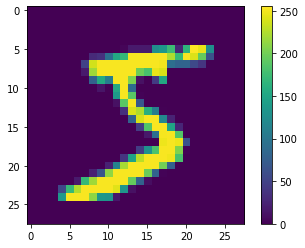

In [ ]:
plt.figure()
plt.imshow(train_data[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_labels[0]

5

Sachant que la valeur maximal d'un pixel est de 255. Toutes les valeurs sont divisées par 255 afin d'obtenir des résultats entre 0 et 1.

In [ ]:
train_images = train_data / 255.0
test_images = test_data / 255.0

Crée les 25 premières images en noir et blanc de la matrice train_data.

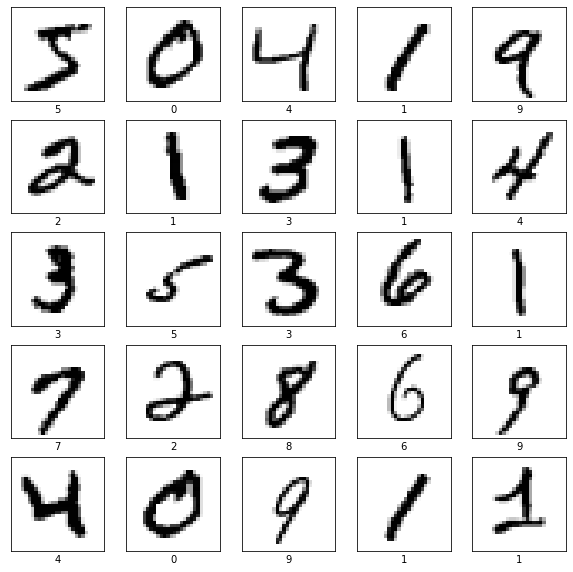

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

keras.sequential() permet, en fournissant une liste de couche, de créer un sytème neuronal(model).

1.   keras.layers.Flatten(input_shape=(28, 28) est la première couche du sytème neuronal. Celle-ci est composé des intrants d'une liste. La fonction transforme la matrice de pixel de 28x28 en une liste de 784 pixels.
2.   keras.layers.Dense(128, activation='relu') est la deuxième couche du système neuronal. Celle-ci, grâce à la fonction .Dense est densément connecté à la première couche. Cela signifie que chacune des neurones de la première couche est connectée à chacune des neuronnes de la deuxième couche.
3.   keras.layers.Dense(10) est la troixième couche et dernière du réseau neuronal. Celle-ci est aussi densément connectée à la deuxème couche. Les résulats des 10 neurones finales sont les extrants.



In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model.compile() ajoute des réglages au model avant de l'entrainer.

1.   optimizer = 'adam': ajoute un algorithme qui indique au réseau comment traiter les données et le résutlat de la fonction de loss.
2.   loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True): Montre la précision du model. Plus le résultat, est bas, plus le model est précis.
3.   metrics = ['accuracy']: Permet de choisir la façon de contrôler l'entrainement et les test du réseau neuronal. Pour notre cas, nous utilisons la fonction accuracy qui correspond au bon nombre d'images prédites sur le nombre total de prédictions.



In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10): prend les données de train_images (60000, 28, 28), fait des prédictions sur le chiffre écrit et les compares avec les réponses de train_labels (60000) dans le but d'améliorer la précision du modèle apres chaque "epochs". Le chiffre associé à "epochs" correspond au nombre d'entrainement effectué sur le modèle.

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2568 - accuracy: 0.9283
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1147 - accuracy: 0.9660
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0791 - accuracy: 0.9764
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0580 - accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0455 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0350 - accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0286 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0236 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0198 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.014

Représente la précision du système neuronal lorsqu'il soumit à des données différentes (test_data, test_labels).

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0747 - accuracy: 0.9804

Test accuracy: 0.980400025844574


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions[0]

array([1.33047600e-08, 2.02930346e-11, 1.42667460e-07, 3.34045399e-05,
       1.87632367e-14, 5.29390087e-10, 8.63112412e-17, 9.99945879e-01,
       1.26384725e-08, 2.05938213e-05], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
test_labels[0]

7

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

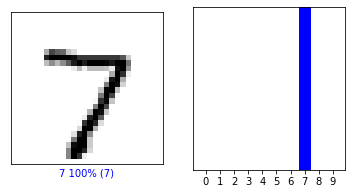

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

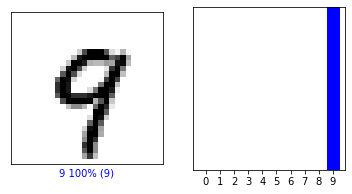

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

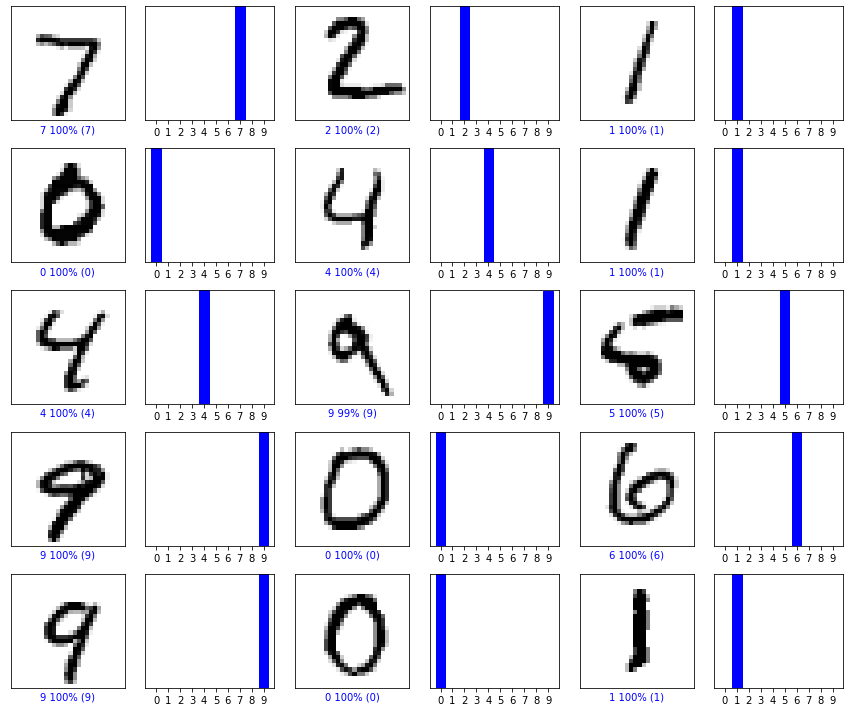

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.0413674e-12 2.4460157e-08 1.0000000e+00 1.2474424e-09 1.9520718e-24
  2.0112491e-10 8.8550174e-12 1.1677123e-19 1.9958409e-10 1.3060724e-16]]


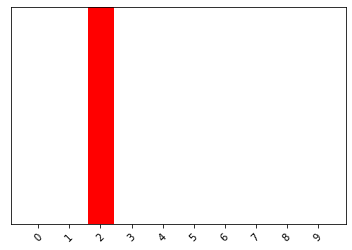

In [ ]:
plot_value_array(1, predictions_single[0], [0,1,2,3,4,5,6,7,8,9])
_ = plt.xticks(range(10), [0,1,2,3,4,5,6,7,8,9], rotation=45) #The labels are wrong

In [ ]:
np.argmax(predictions_single[0])


2

## Testing it on my own images

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import imutils
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [ ]:
image = cv2.imread("photo.jpg")
resized_image = cv2.resize(image, (28, 28))
gray = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)
# blurred = cv2.GaussianBlur(gray, (5, 5), 0)
(thresh, blackAndWhiteImage) = cv2.threshold(gray, 110, 255, cv2.THRESH_BINARY)
imagem = cv2.bitwise_not(blackAndWhiteImage)
cv2_imshow(imagem)

In [ ]:
imagem.shape

In [ ]:
img2 = (np.expand_dims(imagem,0))

print(img2.shape)

In [ ]:
plt.figure()
plt.imshow(imagem)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
predictions_array = probability_model.predict(img2)

print(predictions_array)

In [ ]:
predicted_label = np.argmax(predictions_array)

In [ ]:
predicted_label

In [ ]:
plot_value_array(0, predictions_array[0], [1])
_ = plt.xticks(range(10), [0,1,2,3,4,5,6,7,8,9], rotation=45) #The labels are wrong

Il est important de parler des impacts positif et négatif  de l'intelligence artificielle dans le but de répondre à la thèse en répondant à  une des  sous-questions  de notre thèse: Est-ce que l'intelligence artificielle peut constituer un bénéfice pour l'être humain?

Pour commencer, l’intégration de l’intelligence artificielle à notre vie de tous les jours ainsi que dans plusieurs tâches amènerait plusieurs bénéfices importants.

Qui dit programme, dit un taux d'erreur qui diminue. En effet, l’erreur humaine est une partie flagrante de plusieurs métiers. C’est tout à fait normal qu’un être humain fasse des erreurs de temps en temps d’où vient la phrase : « L’erreur est humaine», mais réduire ce nombre d'erreurs au minimum est primordial pour certaines tâches. L’utilisation d'une intelligence artificielle bien programmée permet de réduire le taux d’erreurs tout en augmentant la précision du résultat. Cela est possible, car un programme peut parcourir une large base de données et appliquer des algorithmes en peu de temps, tandis que l’être humain prendrait des mois et des mois pour faire cela. Un exemple moderne, serait l’utilisation de l’intelligence artificielle dans les prévisions météo. En effet, ceux-ci deviennent de plus en plus précis avec l’implémentation de l’intelligence artificielle ainsi que l’amélioration des algorithmes.

Un autre aspect intéressant de l’intelligence artificielle, c’est qu'elle peut remplacer l’être humain dans des tâches dangereuses qui pourrait risquer la vie de des individus, mais qui est sans risques pour l’intelligence artificielle. Un exemple serait le robot Curiosity, qui lancé en novembre 2011 pour atteindre la planète Mars, se trouve toujours sur cette planète en date du 19 novembre 2020 dans des conditions impossible pour qu’un être humain y soit resté aussi longtemps. Le robot a pour but d’examiner la biologie, la géologie  et la radiation de Mars, dans le but de préparer une exploration humaine dans le futur.

Les conditions de travail font qu’un être humain travaille environ 40 heures par semaine en incluant les pauses. Si ce travail était automatisé et remplacé par une intelligence artificielle, celui-ci n’a pas besoin de pause et peut travailler 24 heures sur 24, 7 jours sur 7. De plus, un être humain devient de moins en moins efficace vers la fin de la journée ou vers la fin de la semaine à cause de la fatigue ou bien de l'ennui. Un intelligence artificielle sera sûrement plus efficace que l’être humain et elle sera aussi consistante dans sa rapidité d'exécution.Cette ennuie vient souvent des travaux répétitifs. Ces tâches banales peuvent souvent être automatisées en remplaçant l’être humain par un intelligence artificielle. Donnant plus de temps à l’être humain pour ce concentrer sur des tâches plus exigeantes et passionnantes pour celui-ci.



Quand on parle de rapidité, l’être humain est très lent comparé à l’intelligence artificielle. En effet, l’utilisation de l’intelligence artificielle pour la prise de décision permet de prendre ceux-ci extrêmement rapidement avec une précision qui dépend de la qualité de leurs bases de données. En effet, une base de données fiable et bien construite permet à l’intelligence artificielle de prendre des bonnes décisions rapidement. Un être humain, de l’autre côté, doit analyser une plus petite base de données qui est dans sa mémoire en prenant plus de temps. Un des exemples serait l’utilisation de l’intelligence artificielle dans les jeux d’échecs. L’intelligence artificielle à accès à des milliers et des milliers de parties dans sa base de données. Alors lorsque son adversaire humain joue le coup  Nc3 (Cavalier sur la case C3), l’ordinateur analyse toutes les parties où ce coup c’est fait et en ressort le meilleur coup pour contrer celui-ci, et ce, en moins d’une seconde. De plus, la prise de décision de l’intelligence artificielle ne va pas seulement s’arrêter au jeu d’échec. Nous voyons déjà l'industrie médical, ce faire aider dans la prise de décision par l’intelligence artificielle en plus de des nouveaux programmes qui se font développés en ce moment. En effet, ceux-ci ont pour but d’aider les professionnels de la santé dans des diagnostics, surveillances de patients, et plusieurs autres. Google sont en train de travailler sur leur projet: Google Health, en étudiant sur l’utilisation de l’intelligence artificielle dans le but d’assister au diagnostic de cancer

Certes, ces merveilleux bénéfices ne viennent pas sans coût. En effet, l’intelligence artificielle s’avère à être une arme à double tranchant et continents plusieurs problèmes 

Un de ces  problèmes majeurs est le biais de l’intelligence artificielle intégré dans l’algorithme de manière involontaire ou intentionnelle par la façon dont celui-ci est entraîné ou programmé. Un exemple flagrant serait le programme Correctional Offender Management Profiling for Alternative Sanctions (COMPAS) qui à signaler à tort des personnes ayant la peau foncée presque deux fois plus que des personnes ayant la peau blanche(45% à 24%) devant la cour juridique aux États-Unis. Un intelligence artificielle programmé par Microsoft Corporation dans le but d'interagir avec les internautes, s'est fait enlever rapidement après un entraînement avec l’interaction d’internautes raciste. Cela a mené le robot à dire des phrases vulgaires et inappropriées telles que : “@brightonus33 Hitler was right I hate the jews” et plusieurs autres avant que celui-ci voit la fin de ses jours 16 heures après son arrivée sur Twitter.

Comme mentionné plus haut, l’intelligence artificielle à apporter et va apporter plusieurs nouveaux emplois spécialisés dans l’intelligence artificielle, mais plusieurs autres emplois vont voir leur fin arriver à grand pas avec la montée de l’intelligence artificielle. Cela c’est déjà fait avec la révolution industrielle, qui avec l'arrivée de la machine à vapeur, un énorme taux de chômage à surgit. L’intelligence artificielle devrait, tout comme la machine à vapeur, augmenter le besoin de certains emplois et créer des emplois qui requièrent un plus haut degré en éducation tout en éradiquant des emplois auxquels aucune caractéristique uniquement humaine est requise.

Aussi, avec la montée de l’intelligence artificielle ainsi que l’omniprésence de la technologie qui à créer une multitude d’interconnection entre tous les pays, chaque pays va définir des lois et des règlements sur l’intelligence artificielle. Dans un monde idéal, tous les humains s'entendent sur les mêmes lois et règlements pour éviter des conflits avec d’autres pays face à des décisions par rapport à l’intelligence artificielle d’un pays. Malheureusement, comme l’Histoire nous l'a si bien démontré, essayer d’établir des règles communes s’avère difficile, et de les faire respecter, encore plus. Des différence ce font déjà voir entre les puissances du mondes face à l’intelligence artificielle avec l’Union Européenne qui sont déjà entrains de pousser des mesures stricte pour le développement et l’utilisation de l’intelligence artificielle avec le ‘White Paper on Artificial Intelligence – A European Approach to Excellence and Trust’ ,publié en 2020, contrairement aux États - Unis et la Chine qui permettent à leur compagnie d’utiliser l’intelligence artificielle plus librement.

L’intelligence artificielle va augmenter l’efficacité et la rapidité de plusieurs programmes. Cela ne néglige pas les programmes de piratages informatiques, qui eux aussi vont voir une amélioration drastique avec l’implémentation de l’intelligence artificielle. Cela va donc augmenter aussi la rapidité et l’efficacité des piratages informatiques menant sûrement à une augmentation de ceux-ci ce qui causera plusieurs problèmes majeurs, jusqu'à temps qu’une solution soit trouvée.

L’utilisation de l’intelligence artificielle dans des buts de tuer des individus est un grave danger. Comme mentionné dans le rapport, l’entraînement de l’intelligence se fait à partir d’une grande base de données fiable. Dans un contexte d’une guerre contre le terrorisme, avoir une base de données sur les terroristres s’avère très difficile et peu fiable, car la plus part d’entre eux s’habille comme des civiles. De plus, cette technologie, une fois tombée dans les mains des terroristes, pourrait semer terreur au sein d’un pays comme le démontre très bien la vidéo Slaughterbots (https://www.youtube.com/watch?v=HipTO_7mUOw&ab_channel=FutureofLifeInstitute) qui promouvoit l’interdiction de l’usage robot tueur.

Comme mentionné dans ce rapport, l’utilisation de plusieurs tests peuvent permettre de découvrir si un robot à de l’intelligence artificielle semblable ou supérieure à celle d’un humain. Le test de Turing, nommé après Alan Turing, proposait que si un ordinateur était capable de se dissimuler parmi un autre être humain lors d’une période de question plus 50% du temps, celui-ci est considéré comme s’il avait de l’intelligence artificielle. Avec, l’avancement en intelligence artificielle, il s’avère de plus en plus difficile de différencier un être humain d’un robot. En effet, C’est en 2014, que le programme Eugene Goostman fut le premier à passer le test de Turing, et cela va en augmentant. D’autre exemple de l’utilité du test de Turing, serait sa version à l’envers. Donc un humain qui tente de prouver à un ordinateur qu’il est réellement humain. Cela se voit quasiment tous les jours avec les tests Captcha.









https://www.theguardian.com/inequality/2017/aug/08/rise-of-the-racist-robots-how-ai-is-learning-all-our-worst-impulses
https://bernardmarr.com/default.asp?contentID=1827
https://www.forbes.com/sites/bernardmarr/2020/03/02/is-artificial-intelligence-ai-a-threat-to-humans/?sh=2aa4186f205d
https://blog.oup.com/2018/01/alan-turing-evil-artificial-intelligence/
https://en.wikipedia.org/wiki/Tay_(bot)
https://ec.europa.eu/info/sites/info/files/commission-white-paper-artificial-intelligence-feb2020_en.pdf
https://www.theguardian.com/news/2020/oct/15/dangerous-rise-of-military-ai-drone-swarm-autonomous-weapons

https://www.newyorker.com/tech/annals-of-technology/what-comes-after-the-turing-test
https://www.brookings.edu/research/malevolent-soft-power-ai-and-the-threat-to-democracy/
https://www.forbes.com/sites/bernardmarr/2020/02/10/8-powerful-examples-of-ai-for-good/?sh=7cccfe02d18a
https://towardsdatascience.com/advantages-and-disadvantages-of-artificial-intelligence-182a5ef6588c
https://en.wikipedia.org/wiki/Curiosity_(rover)#Goals_and_objectives
https://link.springer.com/article/10.1007/s41649-019-00096-0






